In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import skew
import warnings

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set_context("talk")
warnings.filterwarnings('ignore')

In [4]:
data_path = 'anjuke_community_process2.csv'
df = pd.read_csv(data_path, encoding='gbk')
df.head()

community_id community_name  \
0             1           莲园小区   
1         10398           由由四村   
2        114691         紫叶路65弄   
3        114760          北中小区    
4        115387       莲安西路117号   

                                                 url district township  \
0      https://shanghai.anjuke.com/community/view/1/       浦东       北蔡   
1  https://shanghai.anjuke.com/community/view/10398/       浦东       北蔡   
2  https://shanghai.anjuke.com/community/view/114...       浦东       北蔡   
3  https://shanghai.anjuke.com/community/view/114...       浦东       北蔡   
4  https://shanghai.anjuke.com/community/view/115...       浦东       北蔡   

    address  longitude    latitude     age      developer      ...        \
0   莲园路518弄  31.192010  121.564892  1996.0             其它      ...         
1   严中路373弄  31.205109  121.544804  1997.0  上海由由房地产开发有限公司      ...         
2  沪南路1105号  31.187783  121.558899  1996.0         上海建工集团      ...         
3   莲中路255弄  31.189522  121.562974  1998.0  上海北蔡房地产发展有限公司      ...         
4  沪南路1105号  31.187783  121.558899  1996.0         上海建工集团      ...         

  level_comm_num school_score  nursery_num  junior_num  middle_num  \
0          237.0          7.0          5.0         3.0         2.0   
1          398.0          7.0          6.0         4.0         4.0   
2          238.0          7.0          6.0         2.0         2.0   
3          235.0          0.0          0.0         0.0         0.0   
4          238.0          7.0          6.0         2.0         2.0   

   commerce_score  restaurant_num  bank_num  supermarket_num  average_price  
0             5.0           306.0      54.0            128.0          57483  
1             7.0           163.0      50.0             56.0          60335  
2            10.0           271.0      49.0            109.0          57056  
3            10.0           251.0      49.0            115.0          46086  
4            10.0           271.0      49.0            109.0          41399  

[5 rows x 37 columns]

In [9]:
df['age'] = df['age'].astype(np.int64)
df.describe()

community_id     longitude      latitude           age  property_fee  \
count   17776.000000  17776.000000  17776.000000  17776.000000  17776.000000   
mean   179695.661735     31.211316    121.451828   1997.116449      1.345404   
std    237501.297683      0.177920      0.315238     13.012133      1.829523   
min         1.000000     23.750356     97.872173   1900.000000      0.000000   
25%      5882.750000     31.179286    121.413601   1994.000000      0.600000   
50%     62778.000000     31.224314    121.462611   1999.000000      0.925000   
75%    287036.250000     31.272716    121.512788   2004.000000      1.500000   
max    821351.000000     39.109800    121.926870   2018.000000     40.000000   

       total_construction_area   volume_rate   total_houses  parking_space  \
count             1.777600e+04  17776.000000   17776.000000   1.777600e+04   
mean              1.659834e+05      1.825963     642.588940   2.859705e+02   
std               7.020051e+06      0.651906    3916.356367   8.382861e+03   
min               1.000000e+03      0.010000       1.000000   0.000000e+00   
25%               1.650000e+04      1.500000     230.000000   8.000000e+01   
50%               3.390000e+04      1.800000     400.000000   1.460000e+02   
75%               6.079700e+04      2.000000     620.000000   2.300000e+02   
max               6.730500e+08      8.900000  300000.000000   1.111111e+06   

         green_rate      ...        level_comm_num  school_score  \
count  17776.000000      ...          17776.000000  17776.000000   
mean      33.916770      ...            184.761307      5.111245   
std        7.491674      ...            198.785289      3.410782   
min        1.000000      ...              0.000000      0.000000   
25%       30.000000      ...              1.000000      2.000000   
50%       35.000000      ...             97.500000      6.000000   
75%       38.000000      ...            449.000000      8.000000   
max       90.000000      ...            486.000000     10.000000   

        nursery_num    junior_num    middle_num  commerce_score  \
count  17776.000000  17776.000000  17776.000000    17776.000000   
mean       1.868193      1.030969      0.740549        6.726119   
std        3.125533      2.181442      1.616527        2.656207   
min        0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000        6.000000   
50%        0.000000      0.000000      0.000000        7.000000   
75%        3.000000      1.000000      1.000000        8.500000   
max       20.000000     22.000000     14.000000       10.000000   

       restaurant_num      bank_num  supermarket_num  average_price  
count    17776.000000  17776.000000     17776.000000   17776.000000  
mean       160.625113     54.386082        70.602835   56554.645140  
std        114.458936     57.721615        65.028408   26703.580038  
min          0.000000      0.000000         0.000000    2200.000000  
25%         55.000000     10.000000        11.000000   39555.750000  
50%        177.000000     38.000000        57.000000   54764.000000  
75%        248.000000     79.000000       115.000000   69334.000000  
max        500.000000    348.000000       307.000000  181599.000000  

[8 rows x 29 columns]

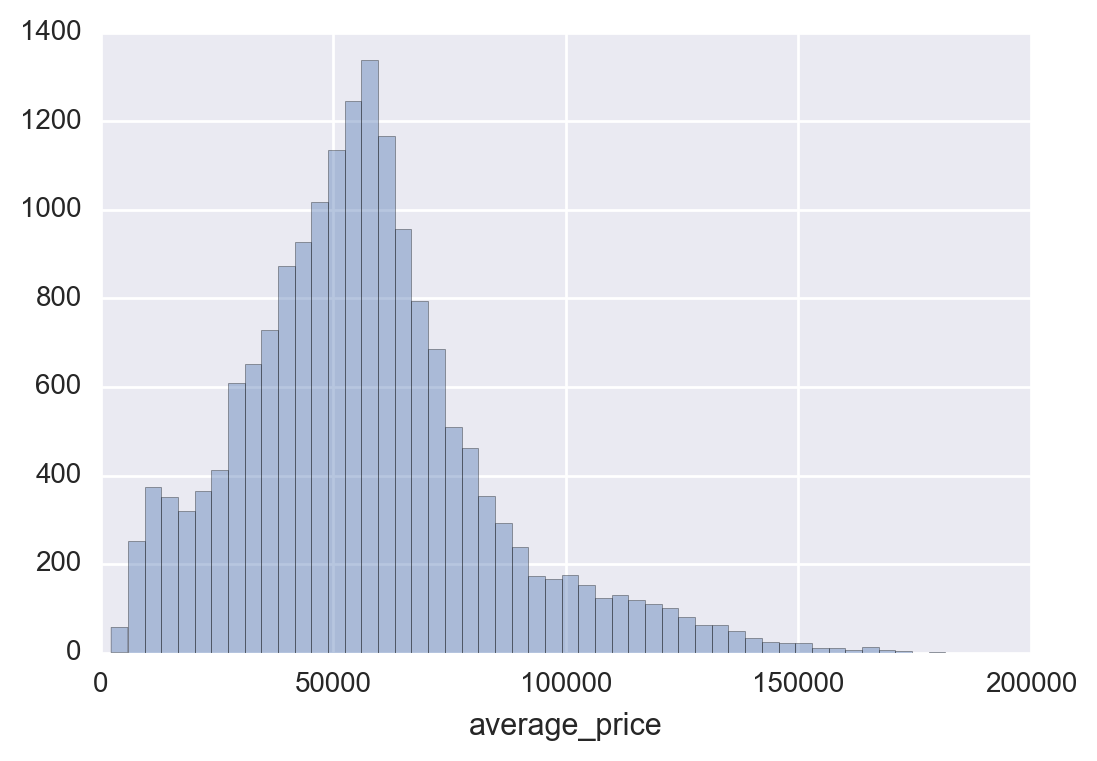

In [15]:
sns.distplot(df['average_price'], kde=False)

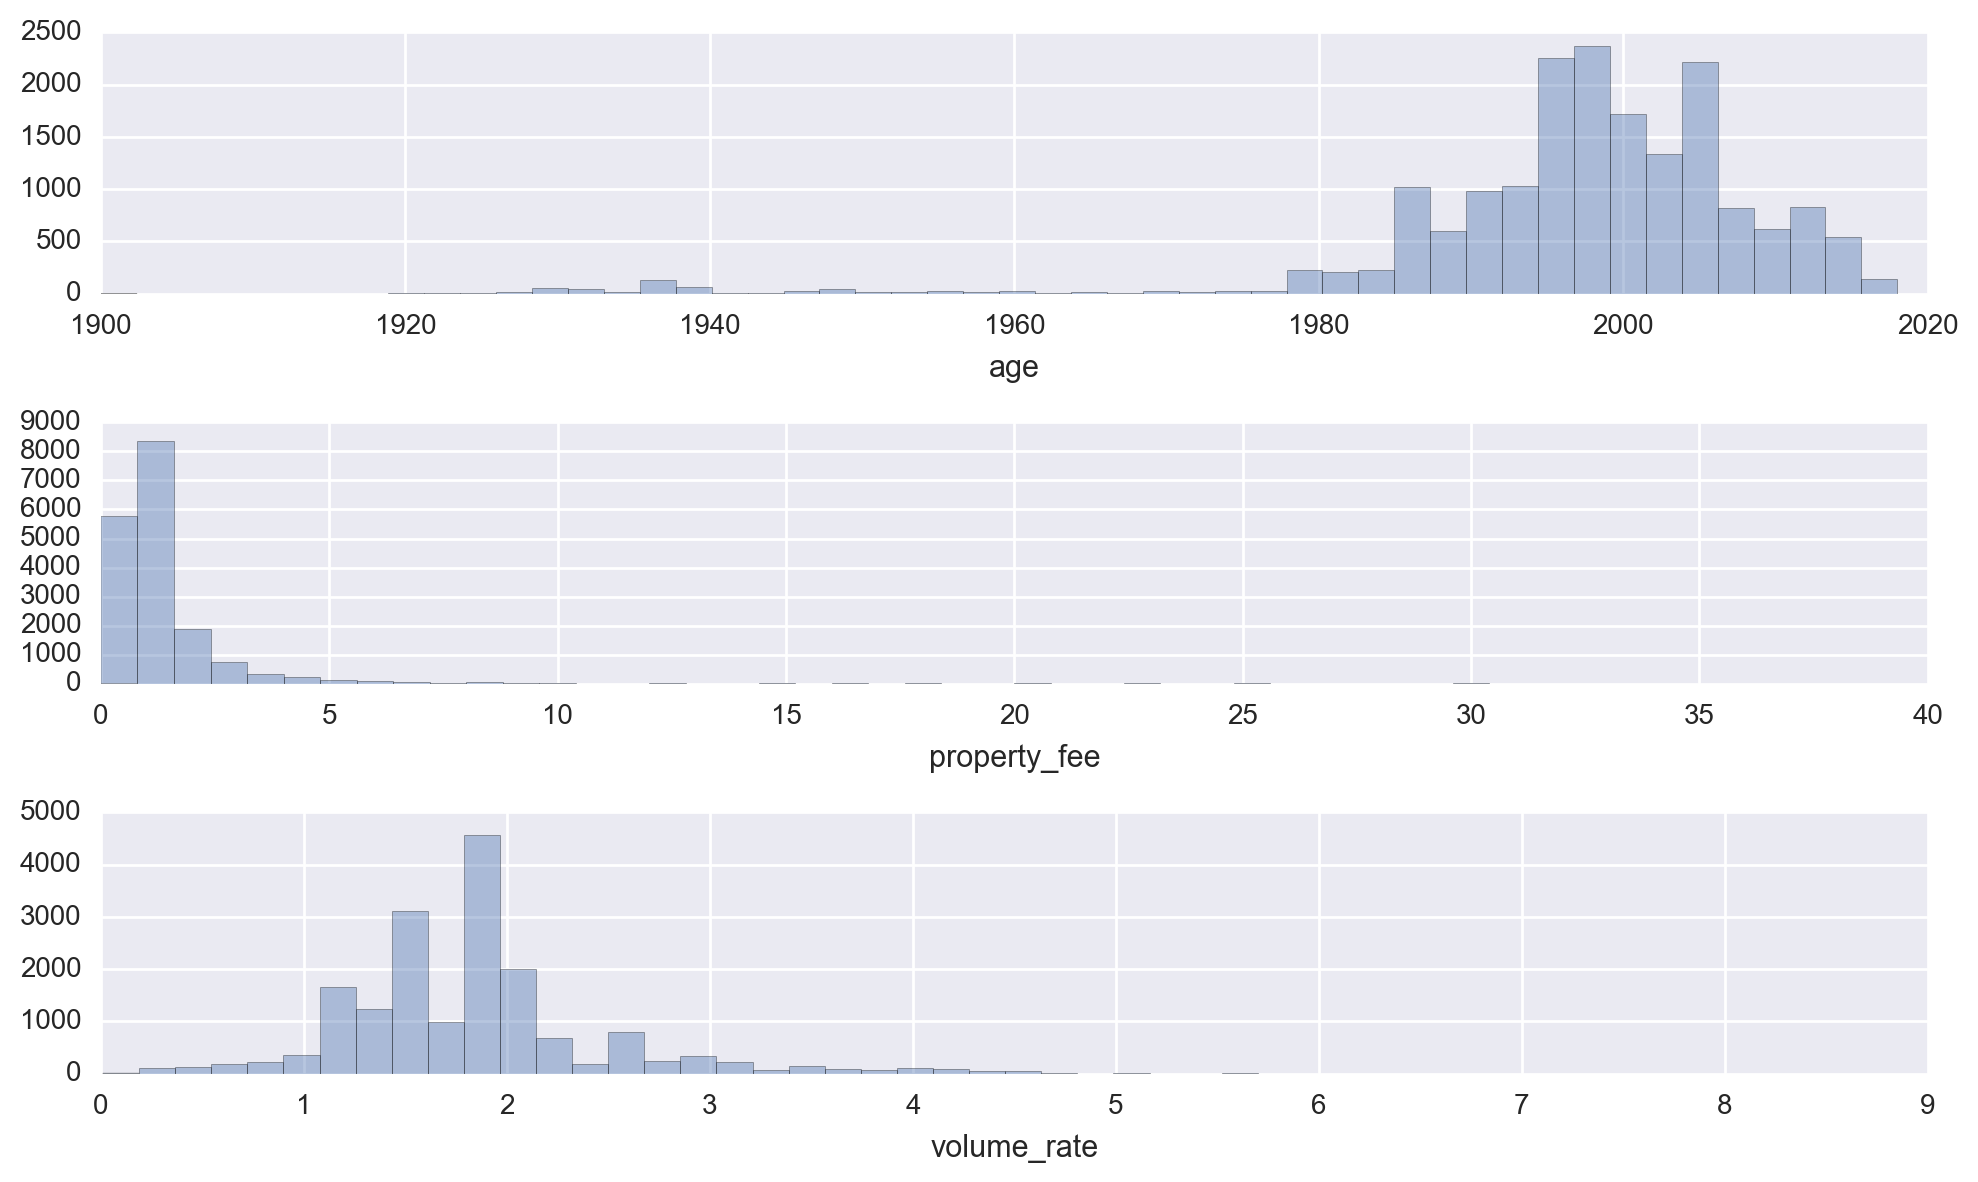

In [13]:
fig, ax = plt.subplots(3, 1, figsize = (10, 6))
sns.distplot(df['age'], kde=False, ax = ax[0])
sns.distplot(df['property_fee'], kde=False, ax = ax[1])
sns.distplot(df['volume_rate'], kde=False, ax = ax[2])
plt.tight_layout()

* 年代小于1980的记录全部删除
* 年代大于2017的全部删除
* 物业费为0的记录全部删除
* 物业费大于5的记录全部删除

In [20]:
df1 = df.drop(df[df['age'] < 1980].index)
print('年代小于1980的记录过滤掉：', df.shape[0] - df1.shape[0]) 
df2 = df1.drop(df1[df1['age'] > 2017].index)
print('年代大于2017的记录过滤掉：', df1.shape[0] - df2.shape[0]) 

年代小于1980的记录过滤掉： 724
年代大于2017的记录过滤掉： 1


In [22]:
df3 = df2.drop(df2[df2['property_fee'] == 0].index)
print('物业费为0的记录过滤掉：', df2.shape[0] - df3.shape[0]) 
df4 = df3.drop(df3[df3['property_fee'] > 5].index)
print('物业费大于5的记录过滤掉：', df3.shape[0] - df4.shape[0]) 

物业费为0的记录过滤掉： 206
物业费大于5的记录过滤掉： 353


# 房价过低的过滤掉

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

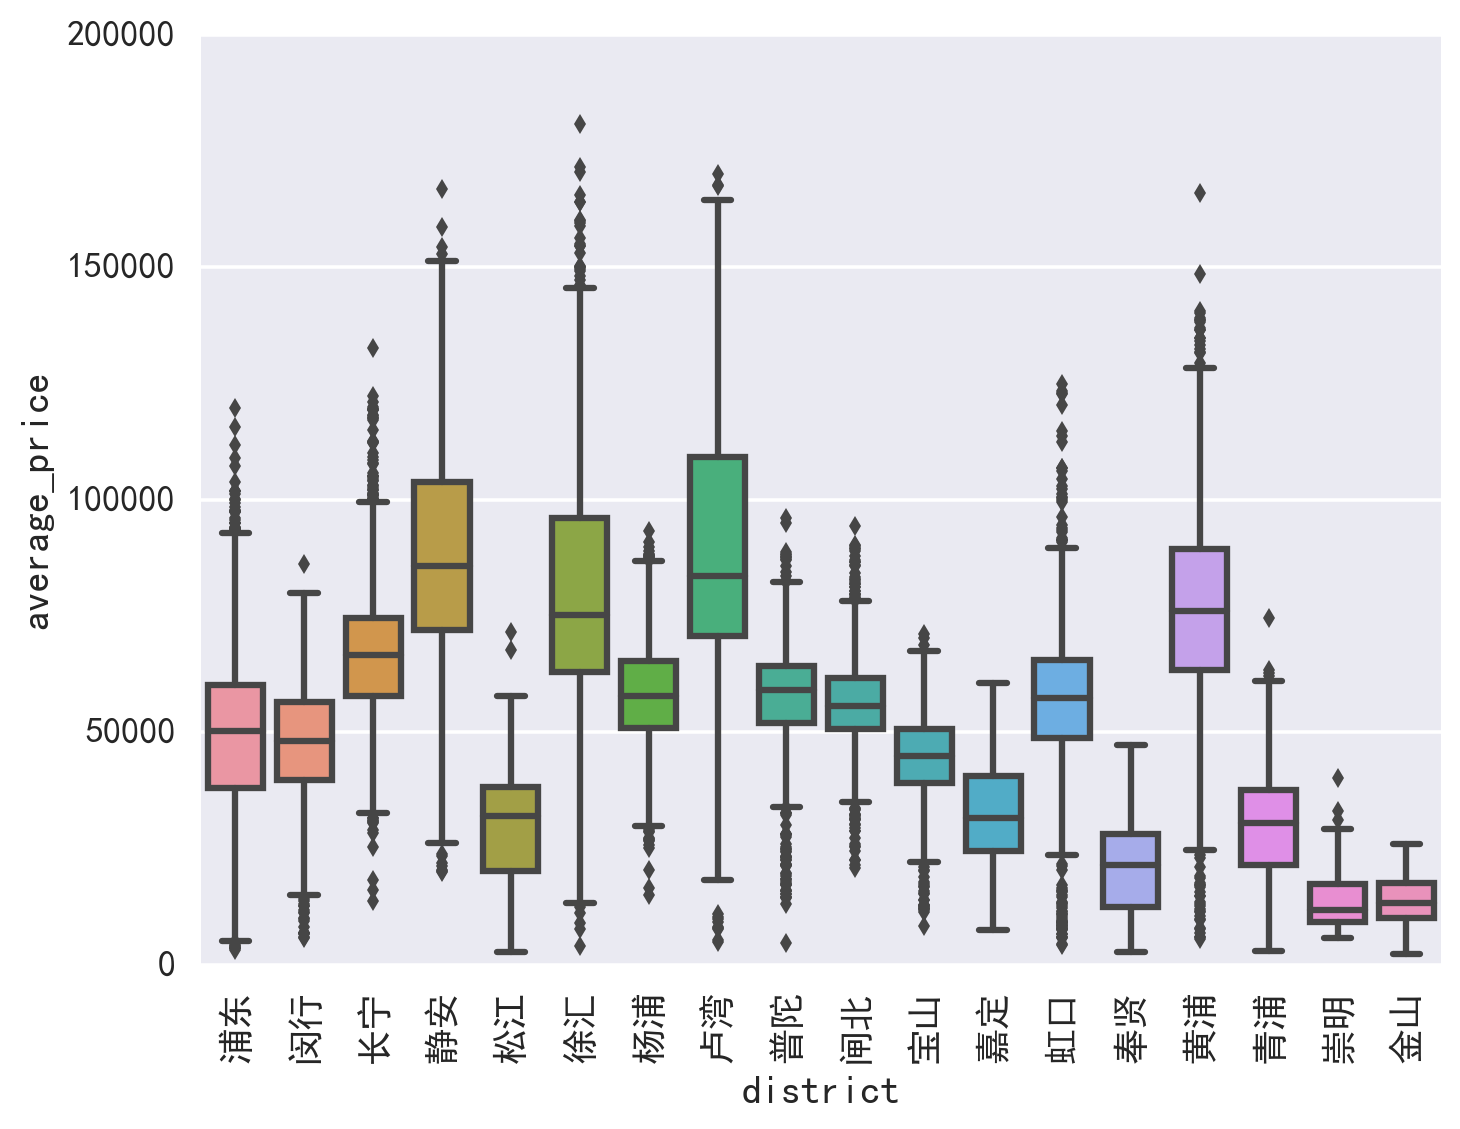

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='district', y='average_price', data=df4)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

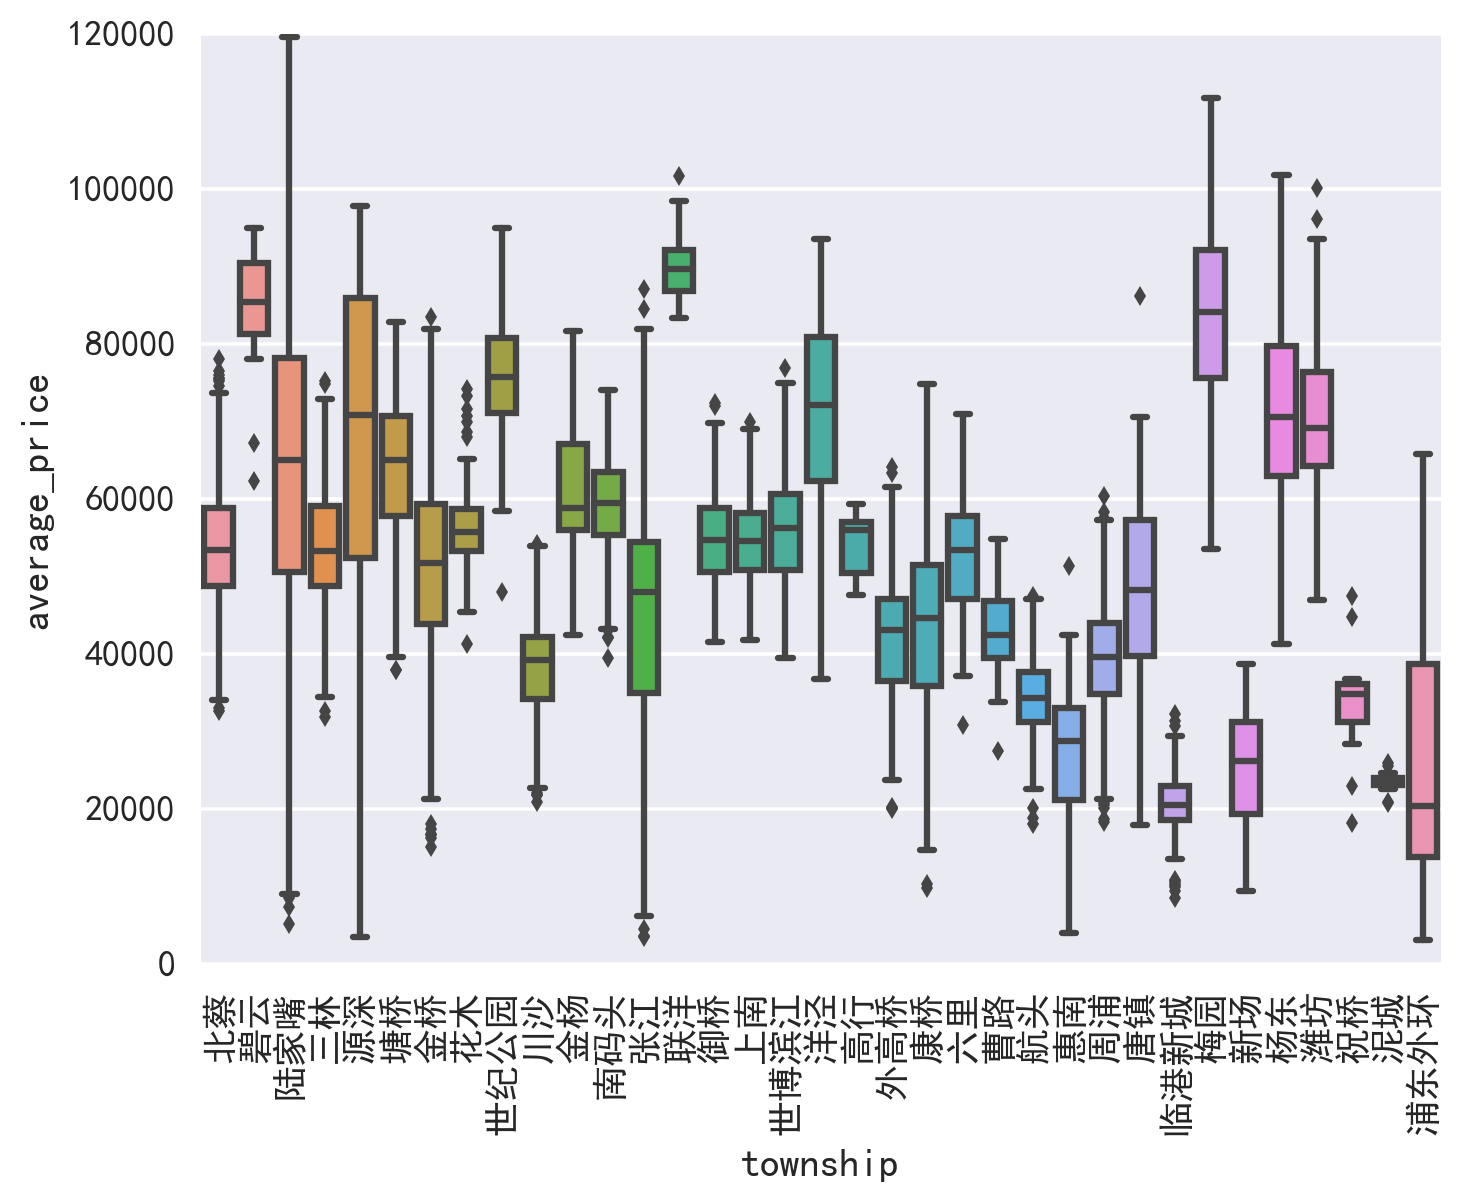

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='township', y='average_price', data=df4[df4['district'] == '浦东'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

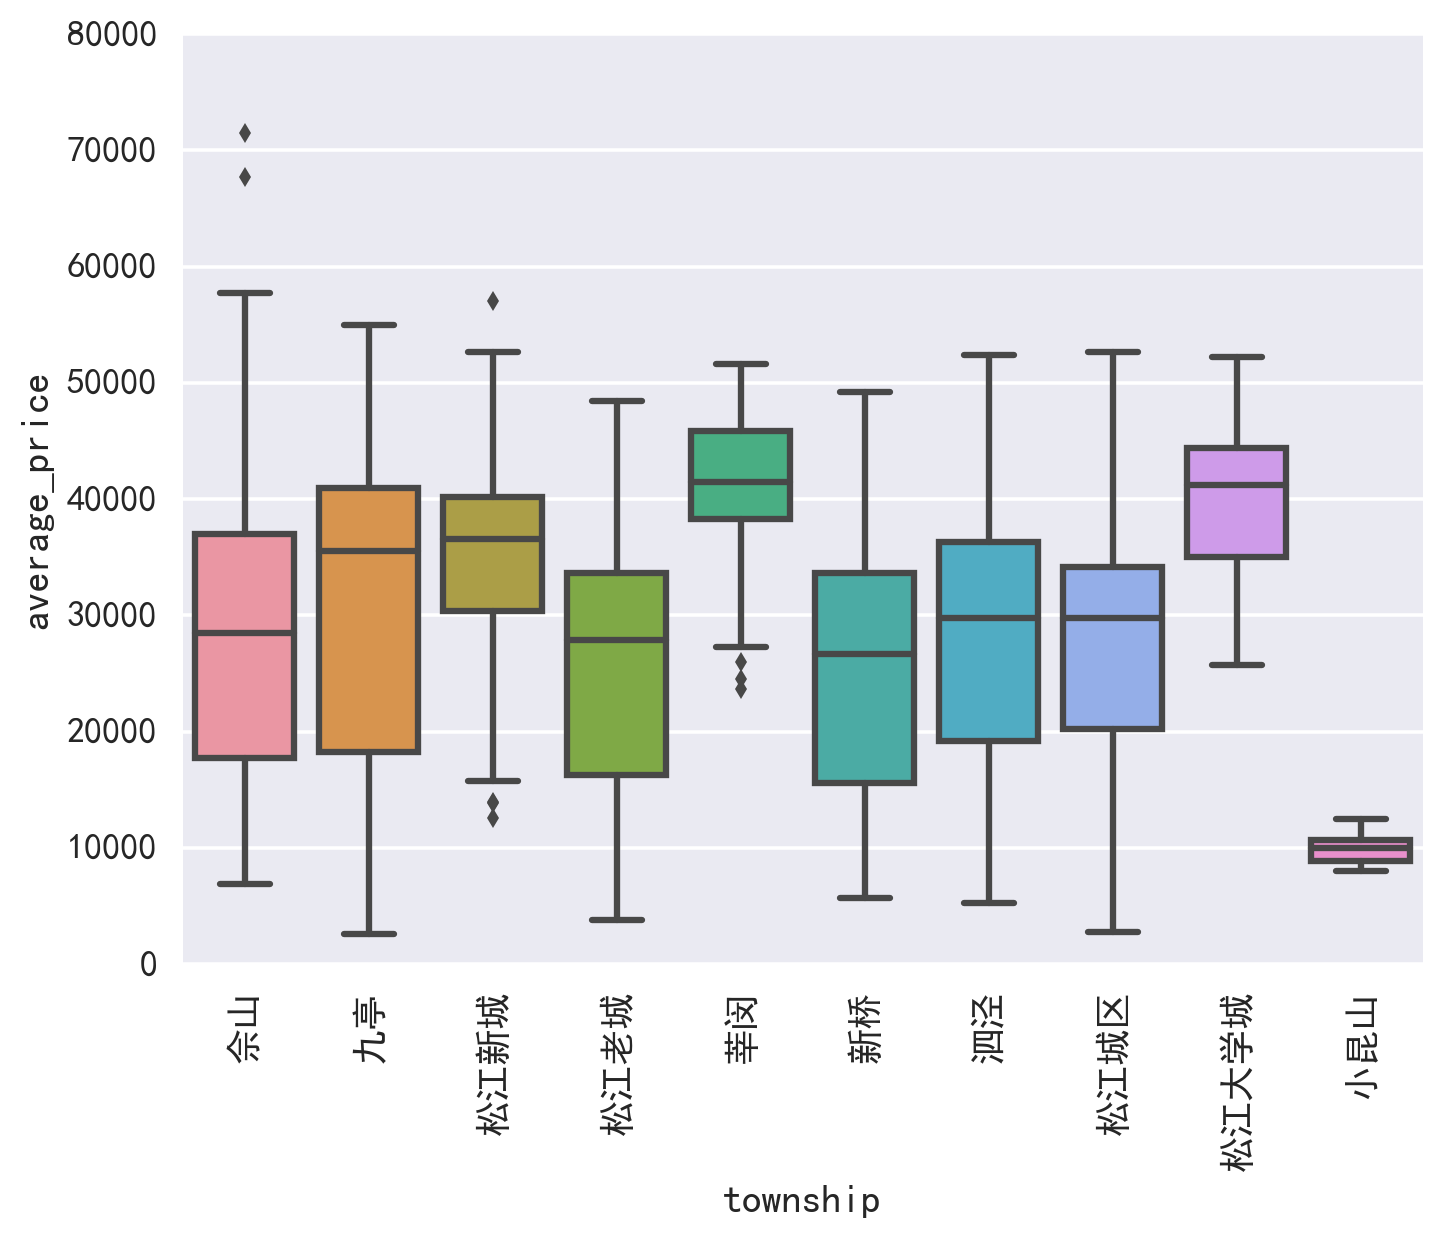

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='township', y='average_price', data=df4[df4['district'] == '松江'])
plt.xticks(rotation=90)

In [42]:
df5 = df4.drop(df4[df4['average_price'] < 10000].index)
print('房价低于10000的记录过滤掉：', df4.shape[0] - df5.shape[0]) 

房价低于10000的记录过滤掉： 360


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

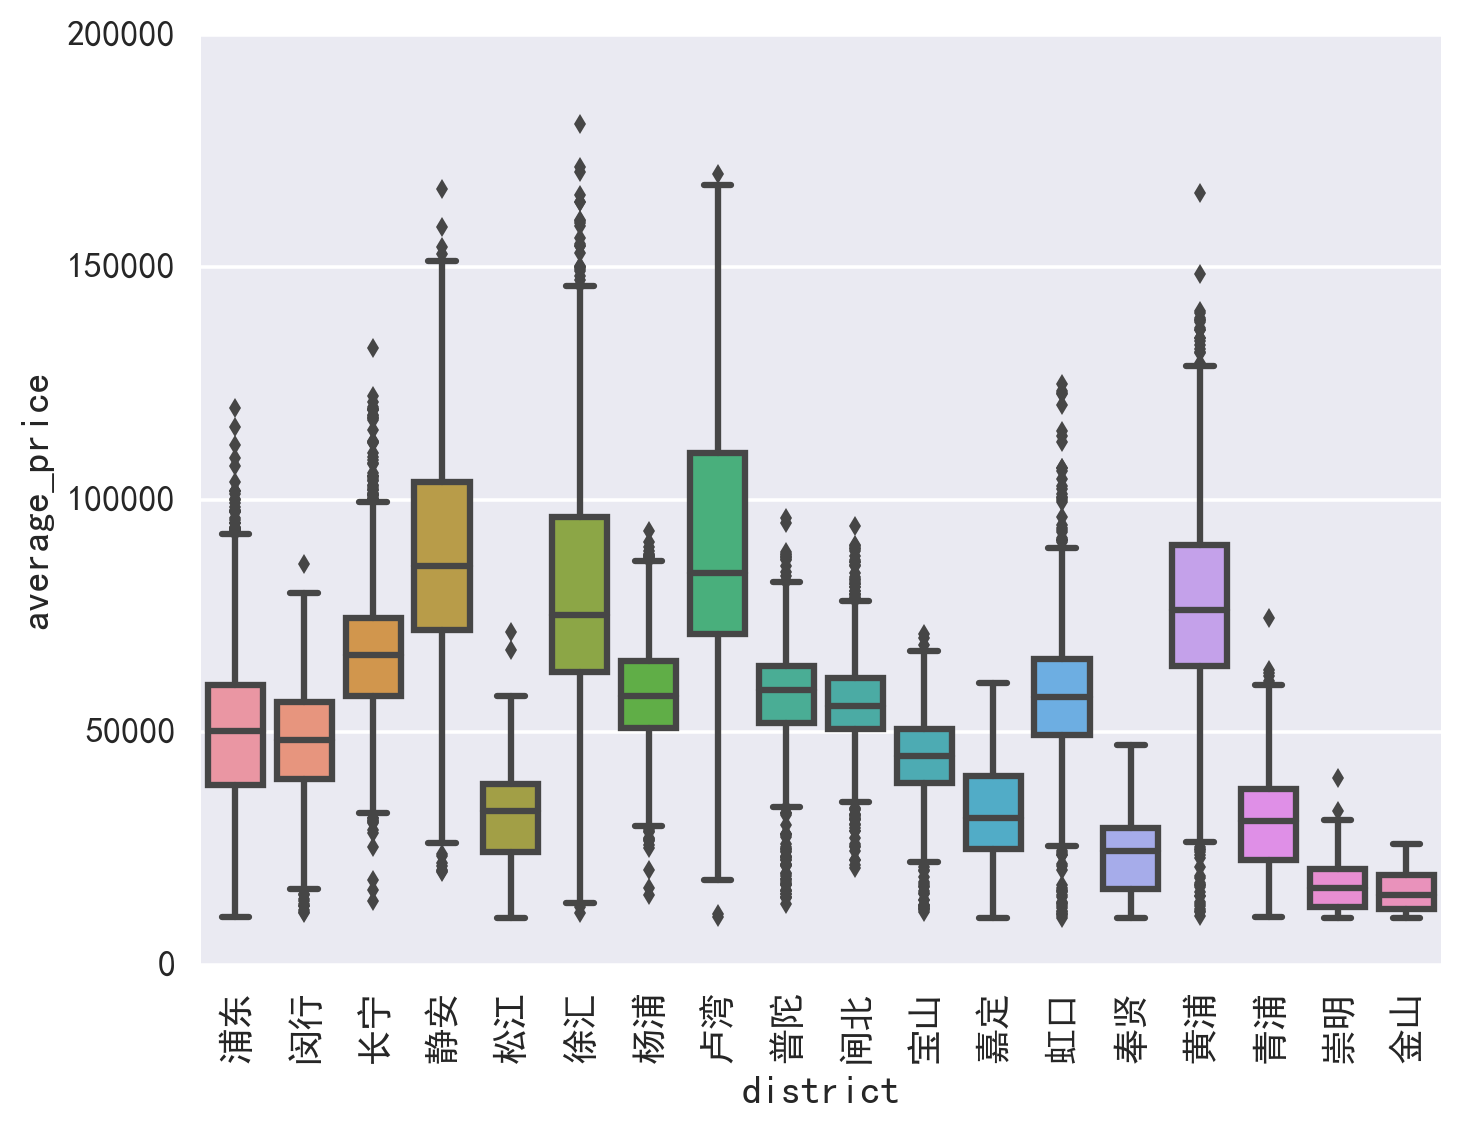

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='district', y='average_price', data=df5)
plt.xticks(rotation=90)

# 相关性分析

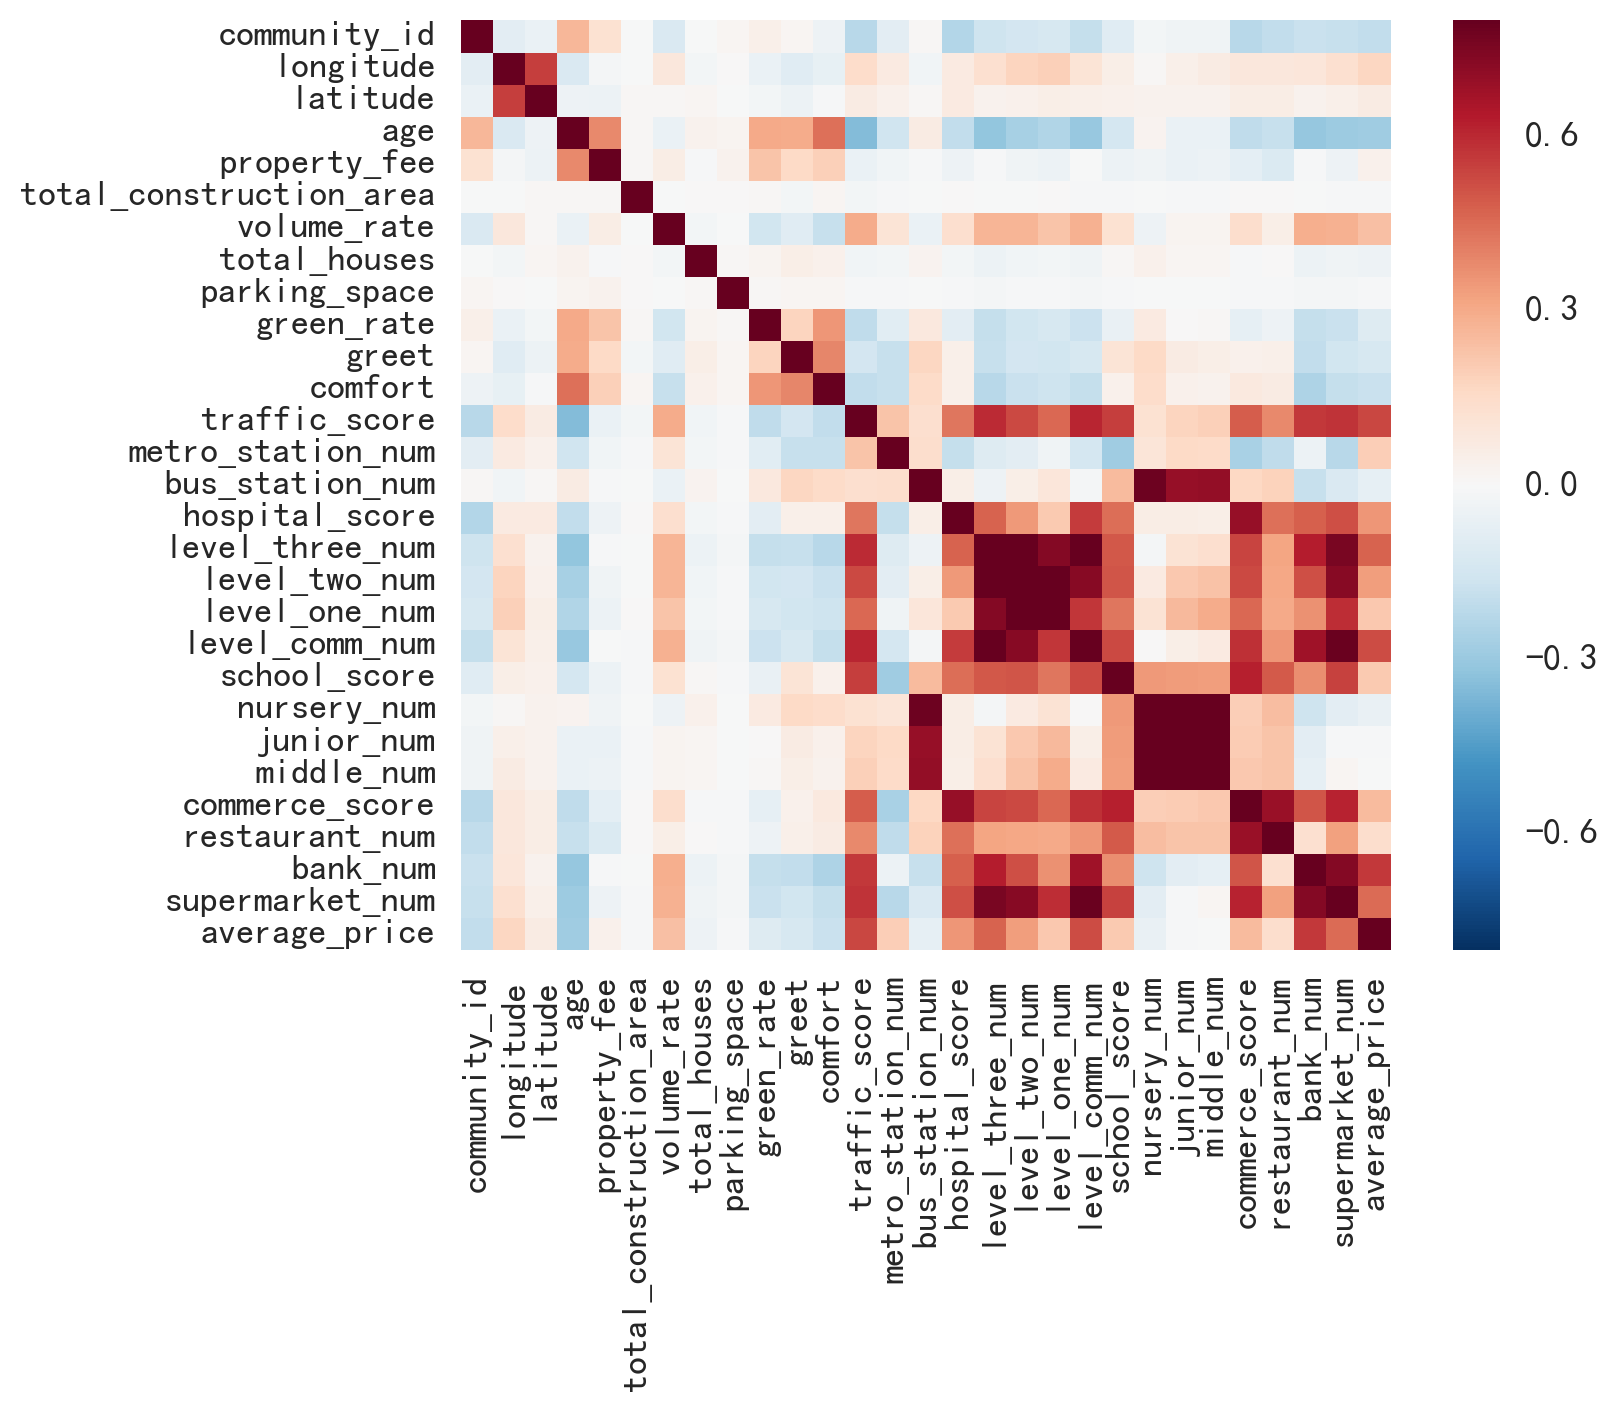

In [50]:
corrmat = df5.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, vmax=.8, square=True)

In [52]:
cor_dict = corrmat['average_price'].to_dict()
del cor_dict['average_price']
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key=lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Sale Price:

bank_num: 	0.5647310171350978
traffic_score: 	0.5334563621062428
level_comm_num: 	0.519995215361935
level_three_num: 	0.47283205771978987
supermarket_num: 	0.4545168743035941
hospital_score: 	0.35027925494041673
level_two_num: 	0.33236813519289193
age: 	-0.28488160656917166
commerce_score: 	0.2527783963119746
volume_rate: 	0.23784043859283852
level_one_num: 	0.21734418354431392
school_score: 	0.2117727318899938
metro_station_num: 	0.19689654510887916
community_id: 	-0.19656733394908601
comfort: 	-0.177460106217048
longitude: 	0.16895748776127975
restaurant_num: 	0.14126143482074596
greet: 	-0.13225168367438364
green_rate: 	-0.10496551010957886
bus_station_num: 	-0.07213123288665746
latitude: 	0.06643138223912344
nursery_num: 	-0.06114582696873901
total_houses: 	-0.04112398536789826
property_fee: 	0.03995216984035098
junior_num: 	-0.011826838406311418
total_construction_area: 	-0.00957002448176983
parking_spa

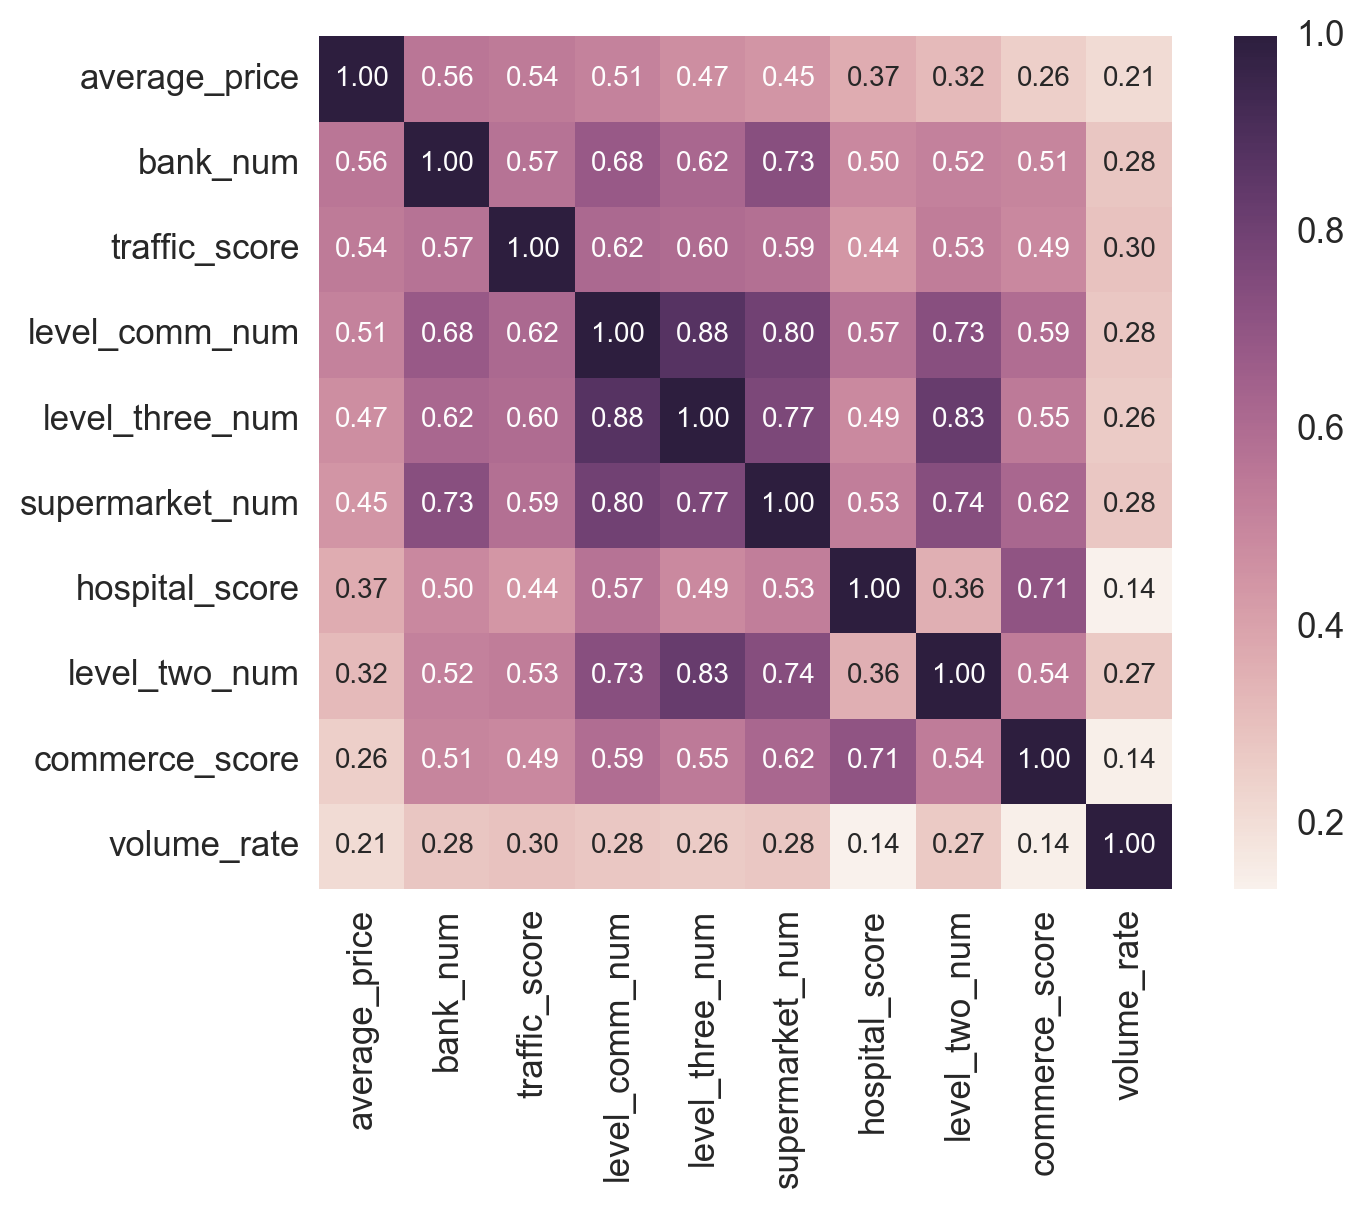

In [55]:
 k = 10  # number of variables for heatmap
cols = corrmat.nlargest(k, 'average_price')['average_price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                     xticklabels=cols.values)

# Model

In [56]:
from sklearn.metrics import r2_score, mean_squared_error
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [61]:
train_labels = df5['average_price']
train_labels.head()

0    57483
1    60335
2    57056
3    46086
4    41399
Name: average_price, dtype: int64

In [65]:
## Standardizing numeric features
numeric_features = df5.loc[:,['bank_num', 'traffic_score', 'level_comm_num', 'level_three_num', 'supermarket_num', 'hospital_score', 
                              'level_two_num','age', 'commerce_score', 'volume_rate', 'level_one_num', 'school_score']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

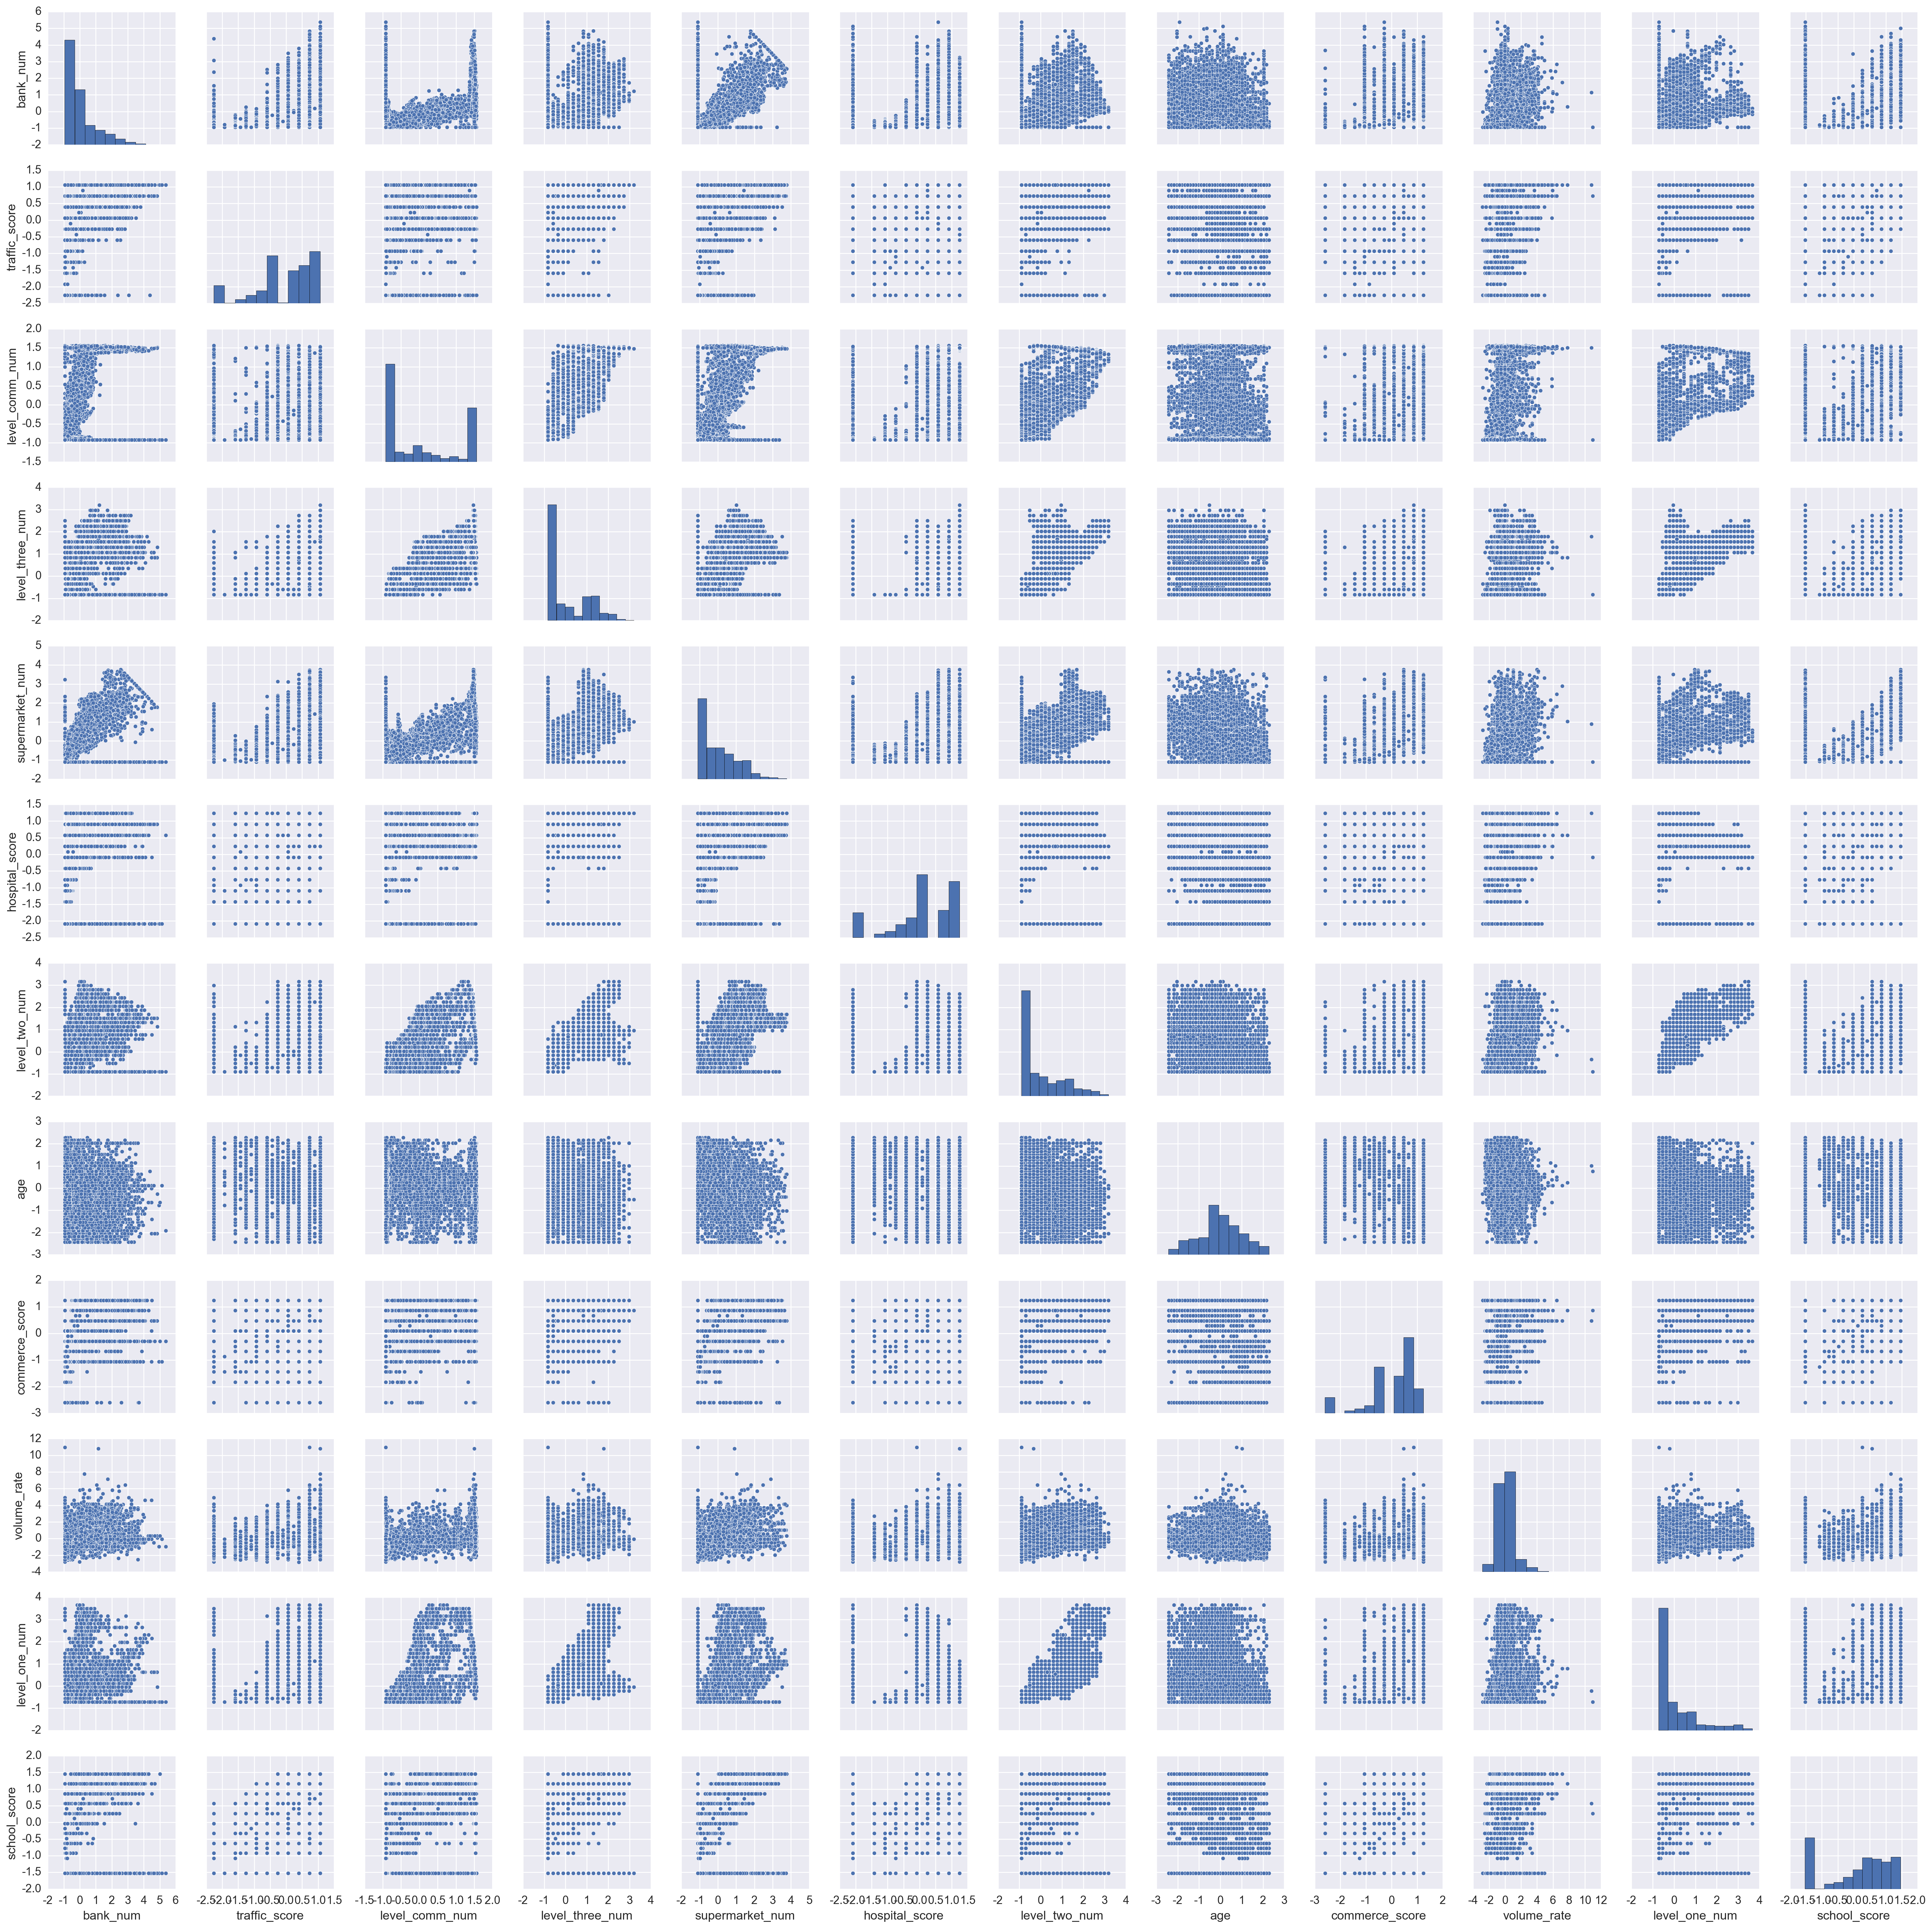

In [64]:
ax = sns.pairplot(numeric_features_standardized)

In [72]:
dummies = pd.get_dummies(df5[['township', 'property_type']])
train_data = pd.concat([numeric_features_standardized, dummies], axis=1)
train_data.head()

bank_num  traffic_score  level_comm_num  level_three_num  supermarket_num  \
0  0.039189      -0.599837        0.291466         -0.35395         0.931320   
1 -0.033390       0.727016        1.114443         -0.35395        -0.207120   
2 -0.051535      -0.268124        0.296578         -0.35395         0.630898   
3 -0.051535      -2.258405        0.281243         -0.35395         0.725768   
4 -0.051535      -0.268124        0.296578         -0.35395         0.630898   

   hospital_score  level_two_num       age  commerce_score  volume_rate  \
0        1.242059      -0.708343 -0.389060       -0.675611    -0.666747   
1        0.576453       0.214961 -0.261733        0.092435     0.262800   
2        1.242059      -0.523683 -0.389060        1.244503    -0.062542   
3        1.242059      -0.708343 -0.134406        1.244503    -0.201974   
4        1.242059      -0.523683 -0.389060        1.244503    -0.062542   

         ...          township_黄兴公园  township_黄浦滨江  township_龙华  \
0        ...                    0.0            0.0          0.0   
1        ...                    0.0            0.0          0.0   
2        ...                    0.0            0.0          0.0   
3        ...                    0.0            0.0          0.0   
4        ...                    0.0            0.0          0.0   

   township_龙柏金汇  property_type_公寓  property_type_其它  property_type_别墅  \
0            0.0               1.0               0.0               0.0   
1            0.0               1.0               0.0               0.0   
2            0.0               1.0               0.0               0.0   
3            0.0               1.0               0.0               0.0   
4            0.0               1.0               0.0               0.0   

   property_type_新里洋房  property_type_普通住宅  property_type_老公房  
0                 0.0                 0.0                0.0  
1                 0.0                 0.0                0.0  
2                 0.0                 0.0                0.0  
3                 0.0                 0.0                0.0  
4                 0.0                 0.0                0.0  

[5 rows x 209 columns]

In [74]:
from sklearn import ensemble, tree, linear_model
from sklearn.cross_validation import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels, test_size=0.1, random_state=200)

In [77]:
ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(
    x_train, y_train)
train_test(ENSTest, x_train, x_test, y_train, y_test)

ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
       cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.1, 0.5, 0.9, 0.99], max_iter=5000, n_alphas=100,
       n_jobs=1, normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)
R2: 0.546348730521953
RMSE: 13502.49921438852
Test
R2: 0.5479080962224263
RMSE: 13672.976713977818


In [78]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(ENSTest, train_data, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.22 (+/- 0.35)


In [79]:
GBest = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)
train_test(GBest, x_train, x_test, y_train, y_test)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.05,
             loss='huber', max_depth=3, max_features='sqrt',
             max_leaf_nodes=None, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
R2: 0.5815345216162553
RMSE: 12924.908587360704
Test
R2: 0.5364386005383601
RMSE: 13618.715820599356


In [81]:
# Average R2 score and standart deviation of 5-fold cross-validation
scores = cross_val_score(GBest, train_data, train_labels, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.26 (+/- 0.47)
